In [2]:
import pandas as pd


data = pd.read_csv("clean.csv")


data.head()


,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,act,id
0,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,0.0,0.0
1,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,0.0,0.0
2,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,0.0,0.0
3,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,0.0,0.0
4,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,0.0,0.0


In [8]:
import pandas as pd

def windowing_data(data, window_size, overlap_size):
    windows = []
    start = 0
    while start + window_size <= len(data):
        windows.append(data[start:start+window_size])
        start += (window_size - overlap_size)
    return windows

# Compute window statistics with absolute values for rotation rates
def compute_abs_window_statistics(windowed_data):
    statistics = []
    for window in windowed_data:
        stats = {
            "rotationRate.x_abs_mean": abs(window["rotationRate.x"]).mean(),
            "rotationRate.y_abs_mean": abs(window["rotationRate.y"]).mean(),
            "rotationRate.z_abs_mean": abs(window["rotationRate.z"]).mean(),
            "userAcceleration.x_mean": window["userAcceleration.x"].mean(),
            "userAcceleration.y_mean": window["userAcceleration.y"].mean(),
            "userAcceleration.z_mean": window["userAcceleration.z"].mean(),
            "act_mode": window["act"].mode()[0],  # Most frequent activity in the window
            "id_mode": window["id"].mode()[0]     # Most frequent id in the window
        }
        statistics.append(stats)

    return pd.DataFrame(statistics)

# Load the data
data = pd.read_csv("clean.csv")

# Define window size and overlap size
window_size = 100
overlap_size = 50

# Windowing the data
windowed_data = windowing_data(data, window_size, overlap_size)

# Calculating basic statistics with absolute values for each window
abs_windowed_statistics = compute_abs_window_statistics(windowed_data)

abs_windowed_statistics.head()


,rotationRate.x_abs_mean,rotationRate.y_abs_mean,rotationRate.z_abs_mean,userAcceleration.x_mean,userAcceleration.y_mean,userAcceleration.z_mean,act_mode,id_mode
0,0.864691,1.194270,0.419195,0.033691,0.034039,0.027288,0.0,0.0
1,1.151868,1.285615,0.613106,0.081757,0.015941,0.172756,0.0,0.0
2,1.125258,1.615102,0.734136,0.129417,-0.062559,0.219736,0.0,0.0
3,0.939231,1.758485,0.674920,0.132675,-0.083021,0.093943,0.0,0.0
4,0.859434,1.700596,0.531677,0.107670,-0.057390,0.074917,0.0,0.0


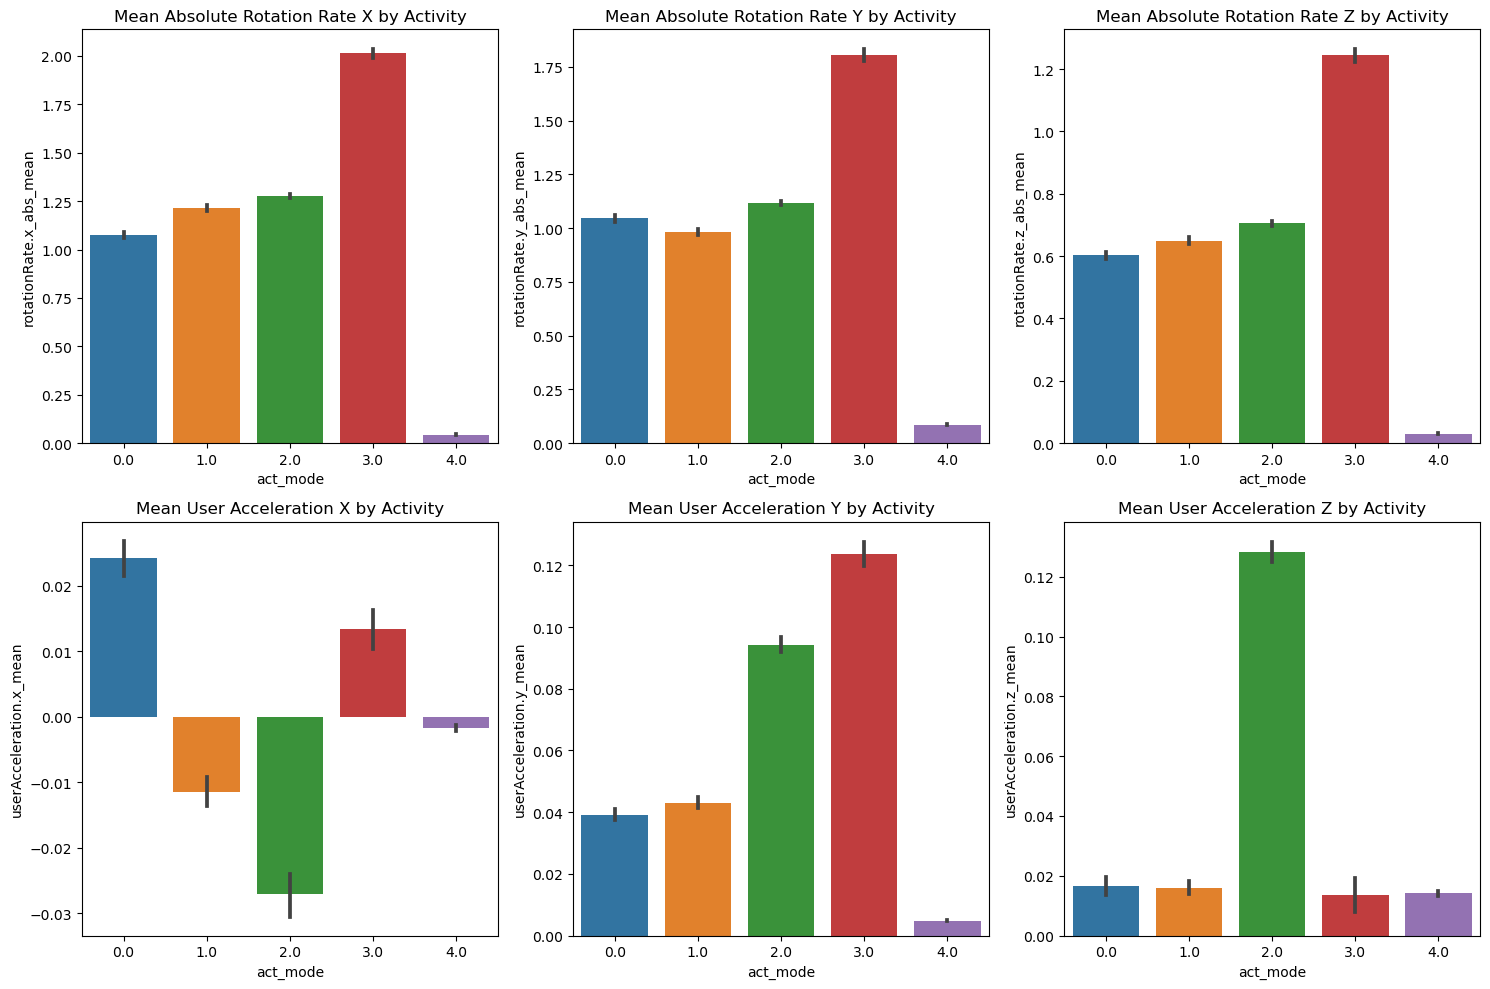

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting mean absolute rotation rates and accelerations for each activity
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Mean Absolute Rotation Rates
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.x_abs_mean', ax=axs[0,0])
axs[0,0].set_title('Mean Absolute Rotation Rate X by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.y_abs_mean', ax=axs[0,1])
axs[0,1].set_title('Mean Absolute Rotation Rate Y by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.z_abs_mean', ax=axs[0,2])
axs[0,2].set_title('Mean Absolute Rotation Rate Z by Activity')

# Mean User Accelerations
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.x_mean', ax=axs[1,0])
axs[1,0].set_title('Mean User Acceleration X by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.y_mean', ax=axs[1,1])
axs[1,1].set_title('Mean User Acceleration Y by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.z_mean', ax=axs[1,2])
axs[1,2].set_title('Mean User Acceleration Z by Activity')

plt.tight_layout()
plt.show()

#Absolute mean of rotation rate:

#On the X-axis, the absolute average rotation rate of jog (jogging) is significantly higher than other activities. This means that when jogging, the device rotates harder on the X-axis.
#On the Y and Z axes, the absolute average rotation rate of dws (downstairs) and ups (upstairs) is relatively high, which may be due to the steps and the back and forth swing of the body when going up and down stairs.
#User acceleration average:

#On the X-axis, jog (jogging) has the highest average user acceleration, which is in line with expectations because the movement speed when jogging is relatively fast.
#On the Y-axis, the average acceleration of users in dws (going downstairs) is higher, which may be due to the added effect of gravity when going downstairs.
#On the Z-axis, the average user acceleration values of dws (downstairs) and ups (upstairs) are relatively high, which may be related to the vertical movement when going up and down stairs.
#Activity features:

#dws (go downstairs) and ups (go up stairs) both have similar characteristics in terms of rotation and acceleration, which means it can be difficult to differentiate between the two activities based on these characteristics alone. But they are distinctly different from other activities such as jogging and walking.
#jog (jogging) exhibits the strongest rotational and acceleration properties of all activities, making it easily distinguishable from other activities


In [11]:
def compute_separate_window_statistics(windowed_data):
    statistics = []
    for window in windowed_data:
        stats = {
            # Mean rotation rates for positive values
            "rotationRate.x_pos_mean": window[window["rotationRate.x"] > 0]["rotationRate.x"].mean(),
            "rotationRate.y_pos_mean": window[window["rotationRate.y"] > 0]["rotationRate.y"].mean(),
            "rotationRate.z_pos_mean": window[window["rotationRate.z"] > 0]["rotationRate.z"].mean(),
            
            # Mean rotation rates for negative values
            "rotationRate.x_neg_mean": window[window["rotationRate.x"] < 0]["rotationRate.x"].mean(),
            "rotationRate.y_neg_mean": window[window["rotationRate.y"] < 0]["rotationRate.y"].mean(),
            "rotationRate.z_neg_mean": window[window["rotationRate.z"] < 0]["rotationRate.z"].mean(),
            
            "act_mode": window["act"].mode()[0],  # Most frequent activity in the window
            "id_mode": window["id"].mode()[0]     # Most frequent id in the window
        }
        statistics.append(stats)

    return pd.DataFrame(statistics)

# Assuming you've already windowed the data into 'windowed_data'
separate_windowed_statistics = compute_separate_window_statistics(windowed_data)


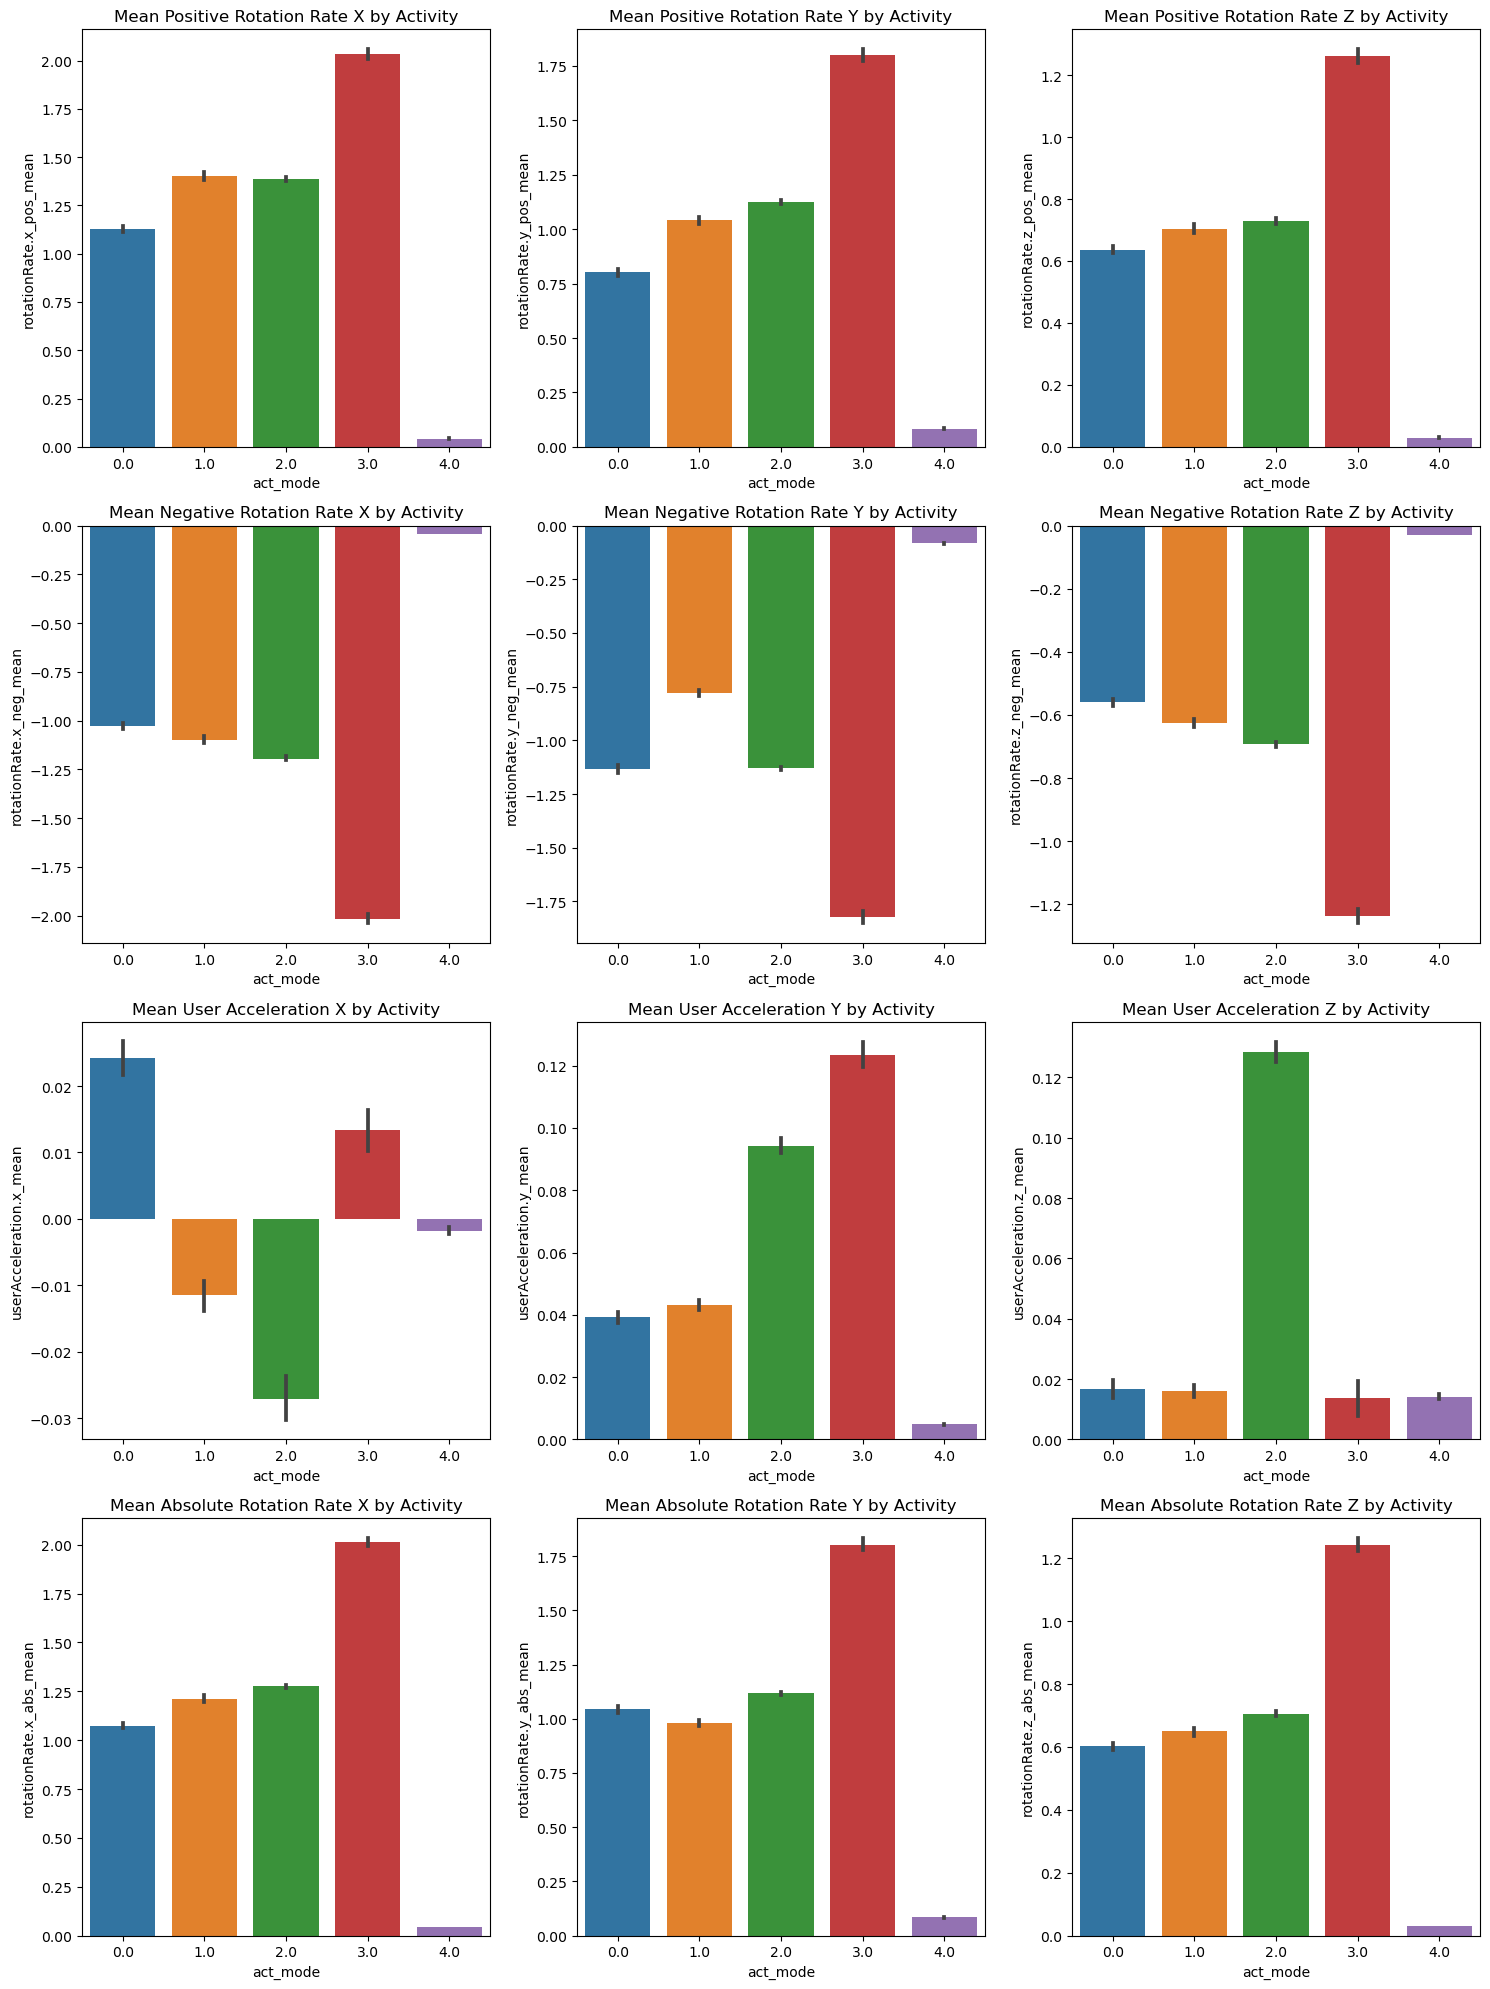

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting mean rotation rates for each activity
fig, axs = plt.subplots(4, 3, figsize=(15,20)) # Adjusted for 4 rows of plots

# Mean Positive Rotation Rates
sns.barplot(data=separate_windowed_statistics, x='act_mode', y='rotationRate.x_pos_mean', ax=axs[0,0])
axs[0,0].set_title('Mean Positive Rotation Rate X by Activity')
sns.barplot(data=separate_windowed_statistics, x='act_mode', y='rotationRate.y_pos_mean', ax=axs[0,1])
axs[0,1].set_title('Mean Positive Rotation Rate Y by Activity')
sns.barplot(data=separate_windowed_statistics, x='act_mode', y='rotationRate.z_pos_mean', ax=axs[0,2])
axs[0,2].set_title('Mean Positive Rotation Rate Z by Activity')

# Mean Negative Rotation Rates
sns.barplot(data=separate_windowed_statistics, x='act_mode', y='rotationRate.x_neg_mean', ax=axs[1,0])
axs[1,0].set_title('Mean Negative Rotation Rate X by Activity')
sns.barplot(data=separate_windowed_statistics, x='act_mode', y='rotationRate.y_neg_mean', ax=axs[1,1])
axs[1,1].set_title('Mean Negative Rotation Rate Y by Activity')
sns.barplot(data=separate_windowed_statistics, x='act_mode', y='rotationRate.z_neg_mean', ax=axs[1,2])
axs[1,2].set_title('Mean Negative Rotation Rate Z by Activity')

# User Accelerations (unchanged, since they were not separated into positive/negative)
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.x_mean', ax=axs[2,0])
axs[2,0].set_title('Mean User Acceleration X by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.y_mean', ax=axs[2,1])
axs[2,1].set_title('Mean User Acceleration Y by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.z_mean', ax=axs[2,2])
axs[2,2].set_title('Mean User Acceleration Z by Activity')

# Mean Absolute Rotation Rates (for comparison)
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.x_abs_mean', ax=axs[3,0])
axs[3,0].set_title('Mean Absolute Rotation Rate X by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.y_abs_mean', ax=axs[3,1])
axs[3,1].set_title('Mean Absolute Rotation Rate Y by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.z_abs_mean', ax=axs[3,2])
axs[3,2].set_title('Mean Absolute Rotation Rate Z by Activity')

plt.tight_layout()
plt.show()


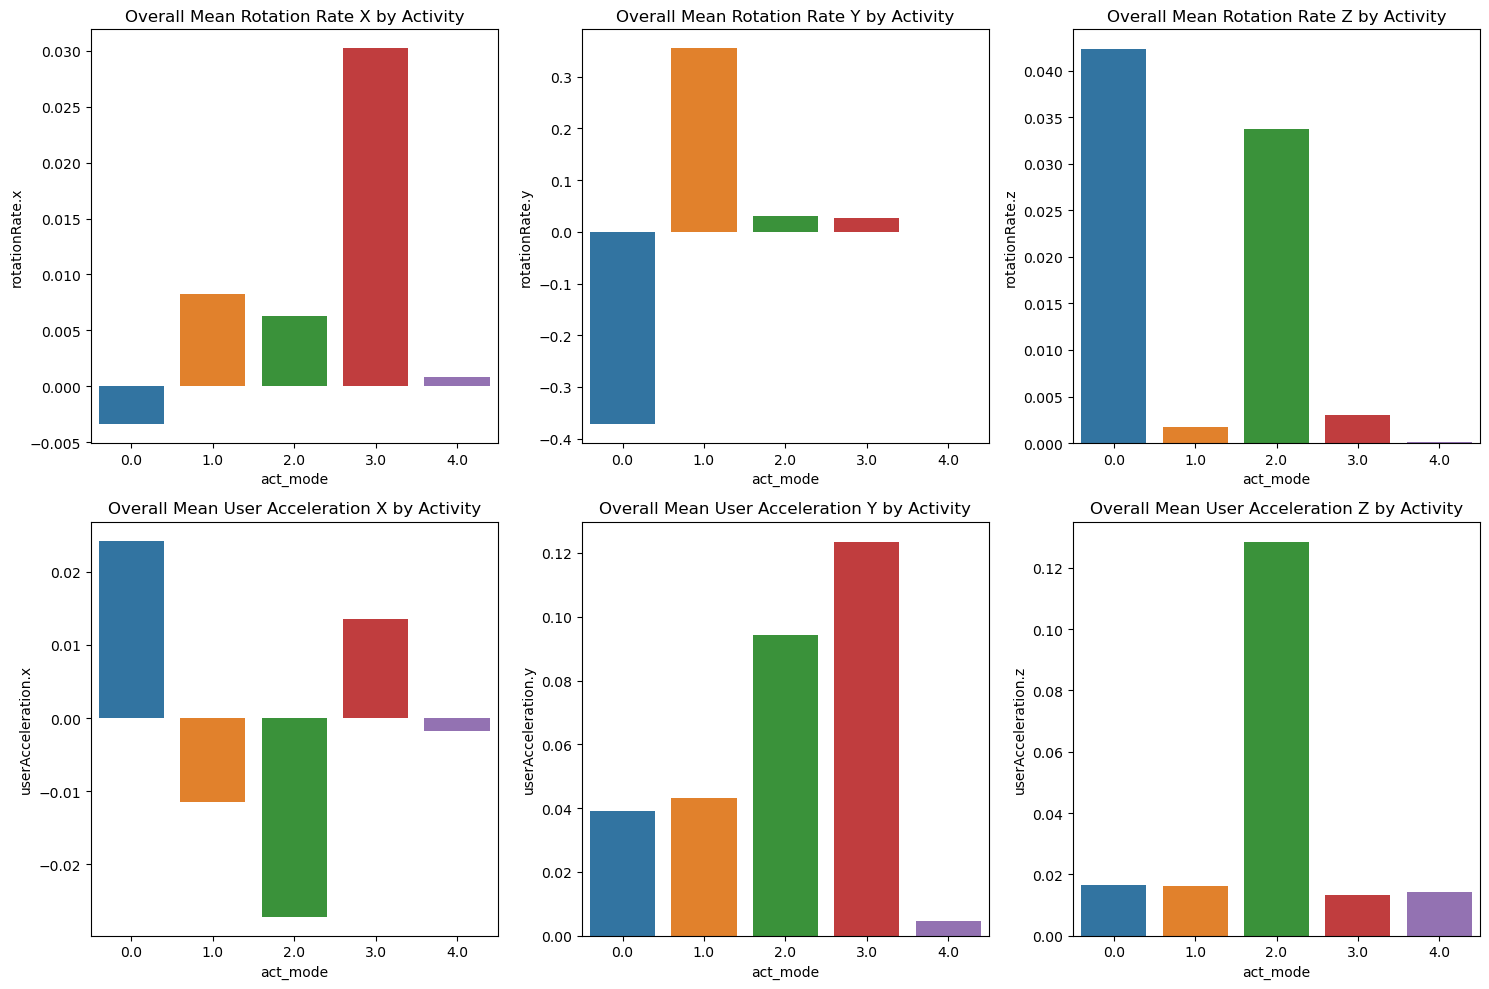

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("clean.csv")

# Compute overall statistics for each activity
overall_statistics = data.groupby('act').mean().reset_index()

# Rename the 'act' column for plotting purposes
overall_statistics['act_mode'] = overall_statistics['act']

# Plotting overall rotation rates and accelerations for each activity
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Mean Rotation Rates
sns.barplot(data=overall_statistics, x='act_mode', y='rotationRate.x', ax=axs[0,0])
axs[0,0].set_title('Overall Mean Rotation Rate X by Activity')
sns.barplot(data=overall_statistics, x='act_mode', y='rotationRate.y', ax=axs[0,1])
axs[0,1].set_title('Overall Mean Rotation Rate Y by Activity')
sns.barplot(data=overall_statistics, x='act_mode', y='rotationRate.z', ax=axs[0,2])
axs[0,2].set_title('Overall Mean Rotation Rate Z by Activity')

# Mean User Accelerations
sns.barplot(data=overall_statistics, x='act_mode', y='userAcceleration.x', ax=axs[1,0])
axs[1,0].set_title('Overall Mean User Acceleration X by Activity')
sns.barplot(data=overall_statistics, x='act_mode', y='userAcceleration.y', ax=axs[1,1])
axs[1,1].set_title('Overall Mean User Acceleration Y by Activity')
sns.barplot(data=overall_statistics, x='act_mode', y='userAcceleration.z', ax=axs[1,2])
axs[1,2].set_title('Overall Mean User Acceleration Z by Activity')

plt.tight_layout()
plt.show()

#Rotation rate:

#For the X-axis, jogging seems to have a higher average rotation rate.
#For the y-axis, going up and down stairs seems to have a higher average rotation rate.
#For the Z-axis, walking and descending stairs activities have the highest average rotation rates.
#User acceleration:

#In the X-axis direction, the acceleration of going downstairs and walking is significantly higher than other activities.
#In the Y-axis direction, jogging and walking activities seem to have higher average user acceleration.
#In the Z-axis direction, the acceleration of walking seems to be higher

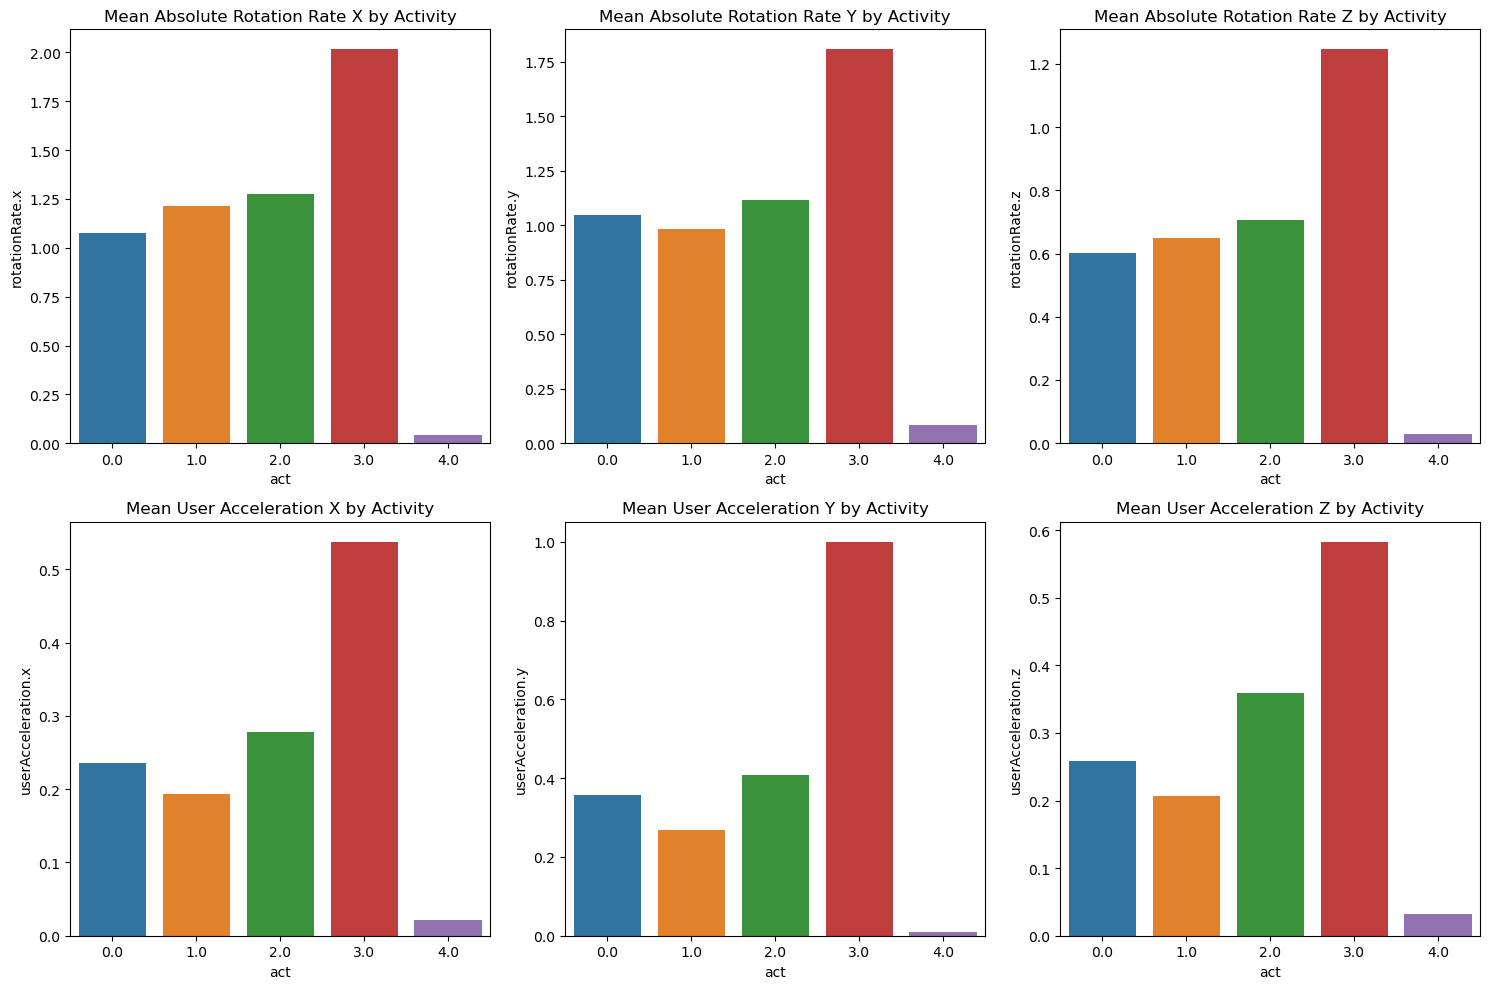

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("clean.csv")

# Compute the mean values with absolute values for rotation rates and user accelerations for each activity
abs_mean_values = data.groupby('act').agg({
    'rotationRate.x': lambda x: abs(x).mean(),
    'rotationRate.y': lambda x: abs(x).mean(),
    'rotationRate.z': lambda x: abs(x).mean(),
    'userAcceleration.x': lambda x: abs(x).mean(),
    'userAcceleration.y': lambda x: abs(x).mean(),
    'userAcceleration.z': lambda x: abs(x).mean()
}).reset_index()

# Plotting mean absolute rotation rates and accelerations for each activity
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Mean Absolute Rotation Rates
sns.barplot(data=abs_mean_values, x='act', y='rotationRate.x', ax=axs[0,0])
axs[0,0].set_title('Mean Absolute Rotation Rate X by Activity')
sns.barplot(data=abs_mean_values, x='act', y='rotationRate.y', ax=axs[0,1])
axs[0,1].set_title('Mean Absolute Rotation Rate Y by Activity')
sns.barplot(data=abs_mean_values, x='act', y='rotationRate.z', ax=axs[0,2])
axs[0,2].set_title('Mean Absolute Rotation Rate Z by Activity')

# Mean User Accelerations
sns.barplot(data=abs_mean_values, x='act', y='userAcceleration.x', ax=axs[1,0])
axs[1,0].set_title('Mean User Acceleration X by Activity')
sns.barplot(data=abs_mean_values, x='act', y='userAcceleration.y', ax=axs[1,1])
axs[1,1].set_title('Mean User Acceleration Y by Activity')
sns.barplot(data=abs_mean_values, x='act', y='userAcceleration.z', ax=axs[1,2])
axs[1,2].set_title('Mean User Acceleration Z by Activity')

plt.tight_layout()
plt.show()

#Rotation Rate:

#X-Axis: We can see that the absolute value of the average rotation rate on the X-axis for the "jog" activity is the highest. This means that when participants were jogging, their device's rotation on the X-axis changed most dramatically.
#Y-axis: On the Y-axis, the activities of “downstairs” and “upstairs” show similar trends, and the absolute values of their rotation rates are relatively high. This may be because when people go up and down stairs, their steps and the position of the device create more rotation on the Y-axis.
#Z-Axis: All activities on the Z-axis have a relatively low rotation rate, but "jog" has a slightly higher rotation rate on the Z-axis than other activities.
#User Acceleration:

#X-axis: On the X-axis, the absolute value of the average user acceleration of the "jog" activity is the highest, which means that when participants are jogging, the acceleration changes of their devices on the X-axis are the most drastic. This is consistent with the body movements of people while jogging, as they may have larger back-and-forth swings.
#Y-axis: On the Y-axis, the absolute value of user acceleration for all activities is relatively low, but the acceleration on the Y-axis for the "jog" activity is slightly higher than other activities.
#Z-axis: The absolute value of user acceleration on the Z-axis is also higher for the "jog" and "walk" activities, which may be due to the up and down movements of the participants in these two activities.
#Activity comparison:

The #"jog" activity has relatively high rotation rates and user acceleration in all three axes, meaning that when participants are jogging, their devices experience greater dynamic changes.


